## The notebook is compiled in connection to Chapter 9, Section 9.1 in the project "Landslide susceptibility mapping - A Machine Learning Approach" written at AAU by group Geo1

This notebook explains how to extract the data from the predictor raster variables to the point layer with landslide presence/absence points

In [8]:
from pyspatialml import Raster
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import geopandas
import pandas as pd
import seaborn as sn
import rasterio.plot
import numpy as np

Setting up the directiry path

In [2]:
os.chdir(r'C:\Users\aageen17\Desktop\external_validation')

Choosing all the predictors

In [4]:
predictors = ['dem_elevation.tif', 'TWI.tif', 'TPI.tif', 'TRI.tif', 'SPI.tif', 'easterness.tif', 'northerness.tif', 'slope_std.tif', 'distance_coast.tif', 'distance_streams.tif', 'average_temp_ref.tif', 'cloudburst_ref.tif', 'groundwater_ref.tif', 'rain_average_ref.tif', 'rain_max_day_ref.tif',  'soil.tif', 'geomorphology.tif', 'underground.tif', 'prequaternary.tif']

Making a raster stack of all the predictors. The predictors have the same extent, projection and resolution


In [5]:
stack = Raster(predictors)

Checking the bands in our stack


In [6]:
stack.names

dict_keys(['dem_elevation', 'TWI', 'TPI', 'TRI', 'SPI', 'easterness', 'northerness', 'slope_std', 'distance_coast', 'distance_streams', 'average_temp_ref', 'cloudburst_ref', 'groundwater_ref', 'rain_average_ref', 'rain_max_day_ref', 'soil', 'geomorphology', 'underground', 'prequaternary'])

Reading the shapefile with landslide (centroids)/nonlandslide (randomly created) points and showing the first five rows

In [6]:
training_pt = geopandas.read_file(r'C:\Users\aageen17\Desktop\external_validation_points\Validation_points.shp')
training_pt.head(5)

,CID,class,geometry
0,0,0,POINT (529480.168 6085204.717)
1,0,0,POINT (530028.828 6094293.069)
2,0,0,POINT (558549.973 6089160.883)
3,0,0,POINT (550963.738 6095130.297)
4,0,0,POINT (521924.300 6117090.821)


Plotting the landslide/non-landslide points on the background of the DEM


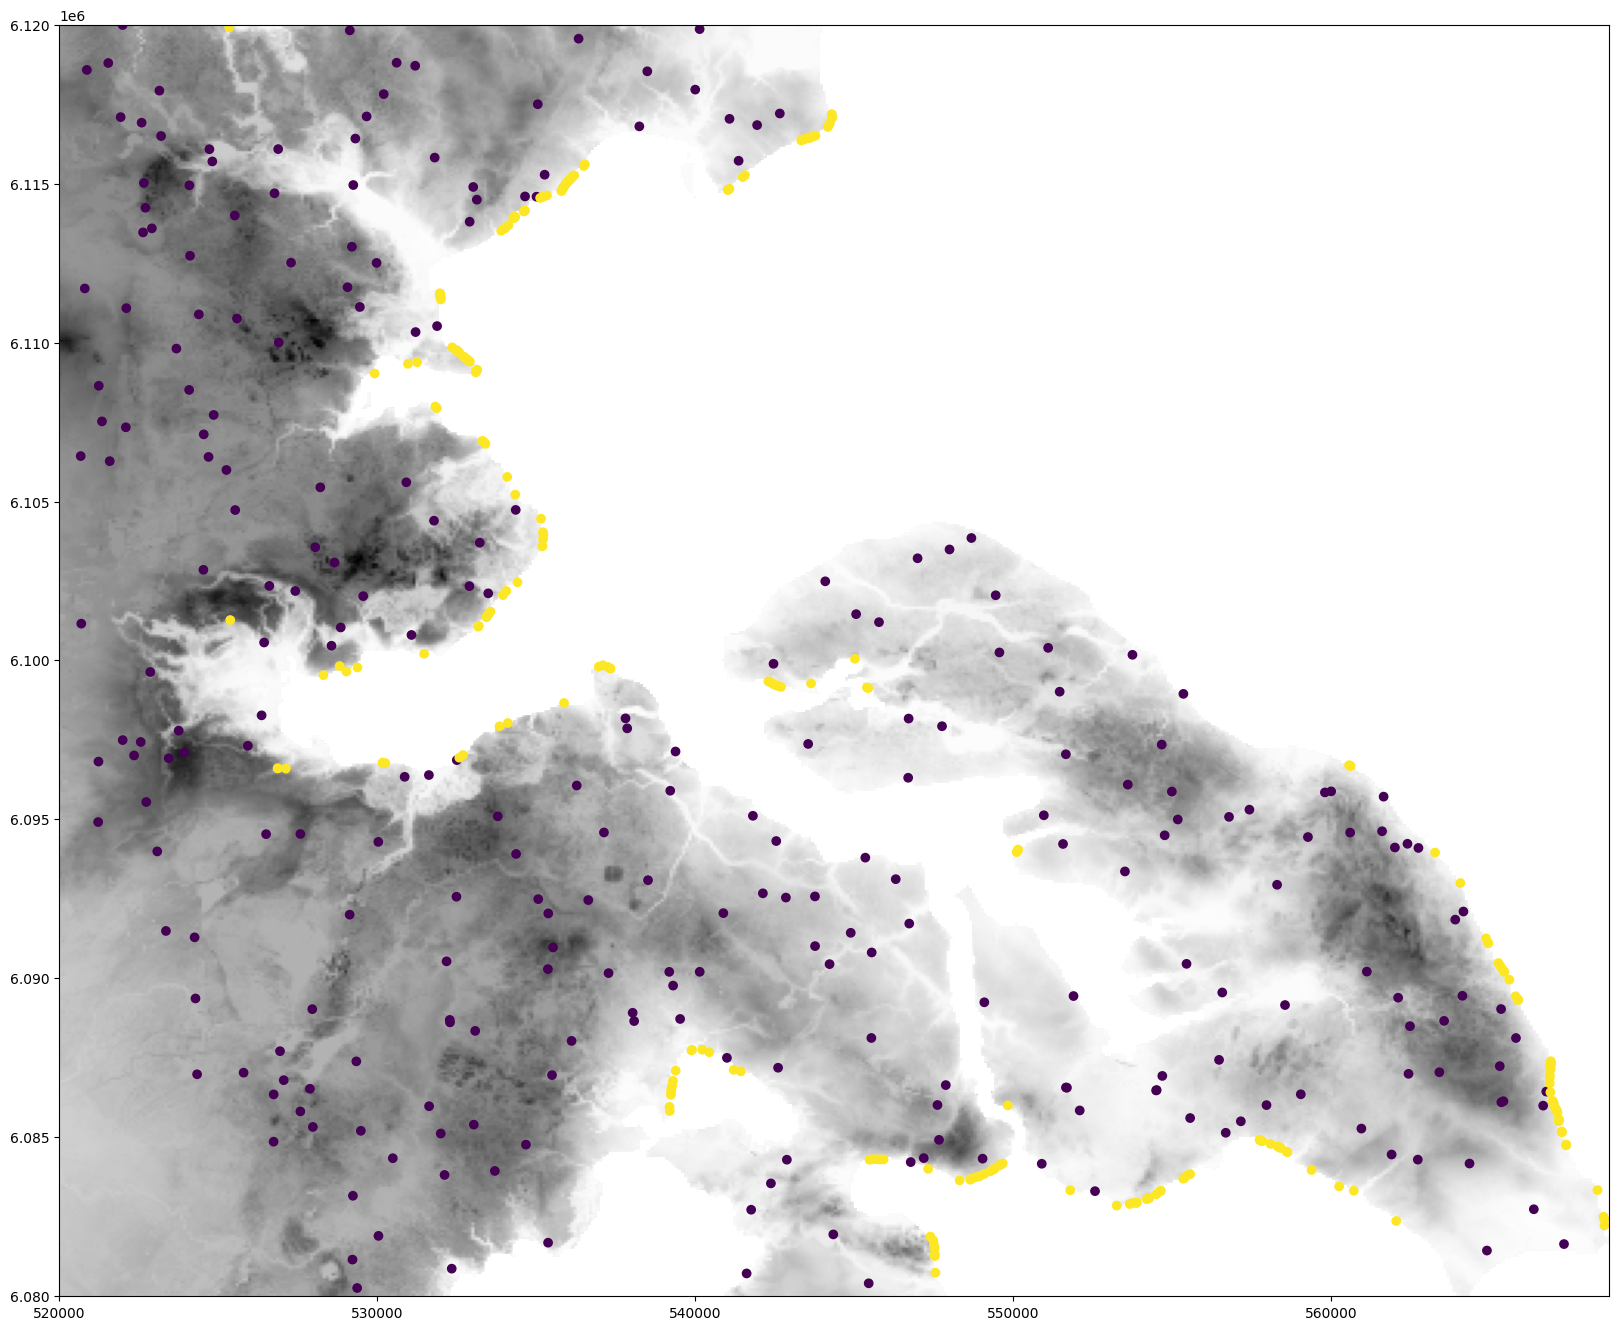

In [7]:
fig, ax = plt.subplots(figsize=(20, 20))
stack.dem_elevation.plot(ax=ax, cmap='Greys')
training_pt.plot(column="class", ax=ax)
plt.savefig(r'figure_external_region.png', bbox_inches='tight', dpi=1300)
plt.show()

Extracting the predictor features from the raster stack to our points


In [8]:
df_points = stack.extract_vector(training_pt)

Showing the first five rows


In [9]:
df_points.head(5)

,,dem_elevation,TWI,TPI,TRI,SPI,easterness,northerness,slope_std,distance_coast,distance_streams,average_temp_ref,cloudburst_ref,groundwater_ref,rain_average_ref,rain_max_day_ref,soil,geomorphology,underground,prequaternary,geometry
pixel_idx,geometry_idx,,,,,,,,,,,,,,,,,,,,
0,0,49.812370,0.083854,-0.003757,0.129422,0.260900,0.996409,-0.084667,0.260900,300.0,300.0,8.714708,0.344714,-1.862408,2.357941,36.355110,13.0,7.0,2.0,6.0,POINT (529480.168 6085204.717)
1,1,49.604942,0.046702,-0.015270,0.073316,0.098046,-0.840527,-0.541769,0.098046,300.0,300.0,8.715714,0.345622,-2.198076,2.336368,35.777359,15.0,7.0,2.0,3.0,POINT (530028.828 6094293.069)
2,2,5.504304,0.015311,0.001757,0.025309,0.187640,0.305586,0.952165,0.187640,300.0,170.0,8.960491,0.348792,-0.754028,1.935387,32.383217,15.0,7.0,3.0,5.0,POINT (558549.973 6089160.883)
3,3,14.678636,0.020014,0.082338,0.082340,1.015810,0.167411,0.985887,1.015810,300.0,300.0,8.940946,0.340399,-0.766196,2.000846,32.761238,15.0,7.0,2.0,3.0,POINT (550963.738 6095130.297)
4,4,49.577496,0.015639,0.011391,0.023651,0.299227,0.997049,0.076766,0.299227,300.0,300.0,8.512472,0.338073,-3.730066,2.325771,34.447304,13.0,1.0,2.0,7.0,POINT (521924.300 6117090.821)


Merging the data frame back with the class

In [10]:
df_points = df_points.merge(
    right=training_pt.loc[:, ["class"]],
    left_on="geometry_idx",
    right_on="index",
    right_index=True
)

In [11]:
df_points.head(5)

,,dem_elevation,TWI,TPI,TRI,SPI,easterness,northerness,slope_std,distance_coast,distance_streams,...,cloudburst_ref,groundwater_ref,rain_average_ref,rain_max_day_ref,soil,geomorphology,underground,prequaternary,geometry,class
pixel_idx,geometry_idx,,,,,,,,,,,,,,,,,,,,,
0,0,49.812370,0.083854,-0.003757,0.129422,0.260900,0.996409,-0.084667,0.260900,300.0,300.0,...,0.344714,-1.862408,2.357941,36.355110,13.0,7.0,2.0,6.0,POINT (529480.168 6085204.717),0
1,1,49.604942,0.046702,-0.015270,0.073316,0.098046,-0.840527,-0.541769,0.098046,300.0,300.0,...,0.345622,-2.198076,2.336368,35.777359,15.0,7.0,2.0,3.0,POINT (530028.828 6094293.069),0
2,2,5.504304,0.015311,0.001757,0.025309,0.187640,0.305586,0.952165,0.187640,300.0,170.0,...,0.348792,-0.754028,1.935387,32.383217,15.0,7.0,3.0,5.0,POINT (558549.973 6089160.883),0
3,3,14.678636,0.020014,0.082338,0.082340,1.015810,0.167411,0.985887,1.015810,300.0,300.0,...,0.340399,-0.766196,2.000846,32.761238,15.0,7.0,2.0,3.0,POINT (550963.738 6095130.297),0
4,4,49.577496,0.015639,0.011391,0.023651,0.299227,0.997049,0.076766,0.299227,300.0,300.0,...,0.338073,-3.730066,2.325771,34.447304,13.0,1.0,2.0,7.0,POINT (521924.300 6117090.821),0


Dropping the "Geometry" column


In [12]:
data= df_points.drop(columns=['geometry'])

Decribing the data

In [13]:
data.describe()

,dem_elevation,TWI,TPI,TRI,SPI,easterness,northerness,slope_std,distance_coast,distance_streams,average_temp_ref,cloudburst_ref,groundwater_ref,rain_average_ref,rain_max_day_ref,soil,geomorphology,underground,prequaternary,class
count,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,533.000000,531.000000,536.000000,536.000000,536.000000
mean,20.135290,0.244451,-0.008599,0.423928,2.318799,0.243170,-0.132470,2.318799,157.149254,260.222015,8.784598,0.341550,-1.959301,2.137129,33.862970,13.996248,5.446328,1.910448,4.205224,0.500000
std,18.428207,0.233691,0.133181,0.425307,2.283054,0.651744,0.707301,2.283054,138.969425,78.695492,0.138966,0.007054,3.069436,0.161720,1.233747,2.842346,2.014673,0.465042,1.153155,0.500467
min,0.402274,0.001110,-0.515859,0.002401,0.032800,-0.999929,-0.999999,0.032800,4.000000,6.000000,8.498430,0.323089,-32.669907,1.899348,31.954372,1.000000,1.000000,1.000000,2.000000,0.000000
25%,5.465367,0.038828,-0.052992,0.062701,0.328095,-0.309631,-0.836977,0.328095,17.000000,274.000000,8.661222,0.337811,-1.540654,1.966813,32.659630,15.000000,4.000000,2.000000,3.000000,0.000000
50%,10.072013,0.147655,-0.000764,0.241882,1.674350,0.406322,-0.270108,1.674350,94.000000,300.000000,8.773860,0.341982,-0.842788,2.146736,33.874176,15.000000,7.000000,2.000000,4.000000,0.500000
75%,37.256358,0.438952,0.027826,0.734017,3.757548,0.817782,0.565536,3.757548,300.000000,300.000000,8.933607,0.347089,-0.603472,2.277047,34.845123,15.000000,7.000000,2.000000,5.000000,1.000000
max,75.153809,0.943547,0.436441,2.166438,10.612181,0.999994,0.999984,10.612181,300.000000,300.000000,8.996345,0.354211,0.000000,2.409014,36.411655,19.000000,10.000000,3.000000,7.000000,1.000000


Cheking the data types in the columns and missing values


In [14]:
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 536 entries, (0, 0) to (535, 535)
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dem_elevation     536 non-null    float64
 1   TWI               536 non-null    float64
 2   TPI               536 non-null    float64
 3   TRI               536 non-null    float64
 4   SPI               536 non-null    float64
 5   easterness        536 non-null    float64
 6   northerness       536 non-null    float64
 7   slope_std         536 non-null    float64
 8   distance_coast    536 non-null    float64
 9   distance_streams  536 non-null    float64
 10  average_temp_ref  536 non-null    float64
 11  cloudburst_ref    536 non-null    float64
 12  groundwater_ref   536 non-null    float64
 13  rain_average_ref  536 non-null    float64
 14  rain_max_day_ref  536 non-null    float64
 15  soil              533 non-null    float64
 16  geomorphology     531 no

Saving data as a .csv file for later use

In [15]:
data.to_csv('sample_points_external_validation.csv', index = False)